# Collecting Data from the internet 
- including direct loading and crawling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

dataPath = 'C:/YONG/m1710/myPydata/'

def rjitt2(arr):
    stdev = .031*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)


# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'

# local data path
localdataPath = 'C:/YONG/m1710/myPydata/'

### 단순 형식으로 된 웹 상의 데이터 직접 가져오기 
- 테이블 형식의 CSV 예제

In [2]:
# 뉴질랜드 국가통계
# Annual enterprise survey: 2018 financial year (provisional) – CSV

smpl_csv = pd.read_csv('https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2018-financial-year-provisional/Download-data/annual-enterprise-survey-2018-financial-year-provisional-csv.csv')
print(smpl_csv.shape)
smpl_csv.head()

(27810, 10)


,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2018,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,691859,ANZSIC06 divisions A-S (excluding classes K633...
1,2018,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,605766,ANZSIC06 divisions A-S (excluding classes K633...
2,2018,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,63509,ANZSIC06 divisions A-S (excluding classes K633...
3,2018,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,22583,ANZSIC06 divisions A-S (excluding classes K633...
4,2018,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,597623,ANZSIC06 divisions A-S (excluding classes K633...


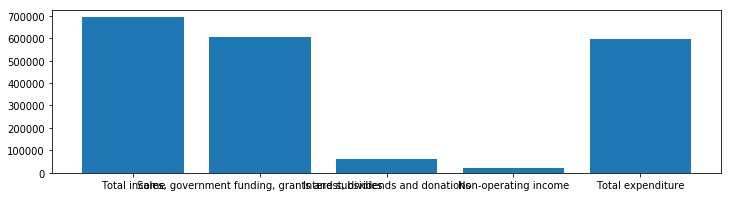

In [3]:
df01 = smpl_csv[smpl_csv.Industry_name_NZSIOC=='All industries'][['Variable_name','Value']]
df02 = df01.head()

plt.figure(figsize=(12,3))
plt.bar(df02.Variable_name, df02.Value.astype(int)) ;

In [3]:
# OECD GDP 통계
# https://data.oecd.org/gdp/gross-domestic-product-gdp.htm
# 다운로드 버튼의 링크를 복사해서 스크립트에 삽입

smpl_csv1 = pd.read_csv('https://stats.oecd.org/sdmx-json/data/DP_LIVE/.GDP.TOT.USD_CAP.A/OECD?contentType=csv&detail=code&separator=comma&csv-lang=en&startPeriod=2016&endPeriod=2016')
print(smpl_csv1.shape)
smpl_csv1.tail()

(57, 8)


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
52,CYP,GDP,TOT,USD_CAP,A,2016,33682.424071,NaN
53,MLT,GDP,TOT,USD_CAP,A,2016,38321.425212,NaN
54,ROU,GDP,TOT,USD_CAP,A,2016,23863.058219,NaN
55,MKD,GDP,TOT,USD_CAP,A,2016,14872.346662,E
56,ZMB,GDP,TOT,USD_CAP,A,2016,3937.429913,NaN


## pandas-datareader 활용
- remote data access using pandas

In [4]:
# 주식시장 데이터 수집 예제

from pandas_datareader import data

# Define the instruments to download. We would like to see Apple, Amazon and the S&P500 index.
tickers = ['AAPL', 'AMZN', '^GSPC']

start_date = '2018-10-25'
end_date = '2019-10-24'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
# yahoo finance 에서 데이터 수집
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)  

print(panel_data.reset_index().columns)
# panel_data.head(9)
panel_data.tail(9)


MultiIndex(levels=[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Date'], ['AAPL', 'AMZN', '^GSPC', '']],
           labels=[[6, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5], [3, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Attributes', 'Symbols'])


Attributes   Adj Close                                 Close               \
Symbols           AAPL         AMZN        ^GSPC        AAPL         AMZN   
Date                                                                        
2019-10-14  235.869995  1736.430054  2966.149902  235.869995  1736.430054   
2019-10-15  235.320007  1767.380005  2995.679932  235.320007  1767.380005   
2019-10-16  234.369995  1777.430054  2989.689941  234.369995  1777.430054   
2019-10-17  235.279999  1787.479980  2997.949951  235.279999  1787.479980   
2019-10-18  236.410004  1757.510010  2986.199951  236.410004  1757.510010   
2019-10-21  240.509995  1785.660034  3006.719971  240.509995  1785.660034   
2019-10-22  239.960007  1765.729980  2995.989990  239.960007  1765.729980   
2019-10-23  243.179993  1762.170044  3004.520020  243.179993  1762.170044   
2019-10-24  243.580002  1780.780029  3010.290039  243.580002  1780.780029   

Attributes                     High                                   Low  \
Symbols           ^GSPC        AAPL         AMZN        ^GSPC        AAPL   
Date                                                                        
2019-10-14  2966.149902  238.130005  1741.890015  2972.840088  234.669998   
2019-10-15  2995.679932  237.649994  1776.449951  3003.280029  234.880005   
2019-10-16  2989.689941  235.240005  1786.239990  2997.540039  233.199997   
2019-10-17  2997.949951  236.149994  1798.849976  3008.290039  233.520004   
2019-10-18  2986.199951  237.580002  1793.979980  3000.000000  234.289993   
2019-10-21  3006.719971  240.990005  1785.880005  3007.330078  237.320007   
2019-10-22  2995.989990  242.199997  1789.780029  3014.570068  239.619995   
2019-10-23  3004.520020  243.240005  1770.050049  3004.780029  241.220001   
2019-10-24  3010.290039  244.800003  1788.339966  3016.070068  241.809998   

Attributes                                  Open                            \
Symbols            AMZN        ^GSPC        AAPL         AMZN        ^GSPC   
Date                                                                         
2019-10-14  1722.000000  2962.939941  234.899994  1728.910034  2965.810059   
2019-10-15  1740.619995  2973.610107  236.389999  1742.140015  2973.610107   
2019-10-16  1770.520020  2985.199951  233.369995  1773.329956  2989.679932   
2019-10-17  1782.020020  2991.790039  235.089996  1796.489990  3000.770020   
2019-10-18  1749.199951  2976.310059  234.589996  1787.800049  2996.840088   
2019-10-21  1765.000000  2995.350098  237.520004  1769.660034  2996.479980   
2019-10-22  1762.000000  2995.040039  241.160004  1788.150024  3010.729980   
2019-10-23  1742.000000  2991.209961  242.100006  1761.300049  2994.010010   
2019-10-24  1760.270020  3000.419922  244.509995  1771.089966  3014.780029   

Attributes      Volume                           
Symbols           AAPL       AMZN         ^GSPC  
Date                                             
2019-10-14  24106900.0  1910200.0  2.557020e+09  
2019-10-15  21840000.0  3111700.0  3.340740e+09  
2019-10-16  18475800.0  2763400.0  3.222570e+09  
2019-10-17  16896300.0  2647400.0  3.115960e+09  
2019-10-18  24358400.0  3362500.0  3.264290e+09  
2019-10-21  21811800.0  2130400.0  3.271620e+09  
2019-10-22  20573400.0  2111700.0  3.523890e+09  
2019-10-23  18957200.0  2138200.0  3.392870e+09  
2019-10-24  17318800.0  4446100.0  3.692600e+09

In [5]:
# Rearrange Index Format

# 인덱스 재설정 후
cdf = panel_data.reset_index()
# 원하는 컬럼명을 다시 부여
cdf.columns = ['Date', 'AdjClose_AAPL', 'AdjClose_AMZN', 'AdjClose_SnP500', 
               'Close_AAPL', 'Close_AMZN', 'Close_SnP500',
              'Hi_AAPL', 'Hi_AMZN', 'Hi_SnP500',
               'Lo_AAPL', 'Lo_AMZN', 'Lo_SnP500',
              'Opn_AAPL', 'Opn_AMZN', 'Opn_SnP500',
              'Vlm_AAPL', 'Vlm_AMZN', 'Vlm_SnP500']           
cdf.tail()

,Date,AdjClose_AAPL,AdjClose_AMZN,AdjClose_SnP500,Close_AAPL,Close_AMZN,Close_SnP500,Hi_AAPL,Hi_AMZN,Hi_SnP500,Lo_AAPL,Lo_AMZN,Lo_SnP500,Opn_AAPL,Opn_AMZN,Opn_SnP500,Vlm_AAPL,Vlm_AMZN,Vlm_SnP500
247,2019-10-18,236.410004,1757.510010,2986.199951,236.410004,1757.510010,2986.199951,237.580002,1793.979980,3000.000000,234.289993,1749.199951,2976.310059,234.589996,1787.800049,2996.840088,24358400.0,3362500.0,3.264290e+09
248,2019-10-21,240.509995,1785.660034,3006.719971,240.509995,1785.660034,3006.719971,240.990005,1785.880005,3007.330078,237.320007,1765.000000,2995.350098,237.520004,1769.660034,2996.479980,21811800.0,2130400.0,3.271620e+09
249,2019-10-22,239.960007,1765.729980,2995.989990,239.960007,1765.729980,2995.989990,242.199997,1789.780029,3014.570068,239.619995,1762.000000,2995.040039,241.160004,1788.150024,3010.729980,20573400.0,2111700.0,3.523890e+09
250,2019-10-23,243.179993,1762.170044,3004.520020,243.179993,1762.170044,3004.520020,243.240005,1770.050049,3004.780029,241.220001,1742.000000,2991.209961,242.100006,1761.300049,2994.010010,18957200.0,2138200.0,3.392870e+09
251,2019-10-24,243.580002,1780.780029,3010.290039,243.580002,1780.780029,3010.290039,244.800003,1788.339966,3016.070068,241.809998,1760.270020,3000.419922,244.509995,1771.089966,3014.780029,17318800.0,4446100.0,3.692600e+09


- Google Finance has discontinued their API, and as such this feature is deprecated (marked for removal) in Pandas Datareader. Alternatives to Google Finance include Alpha Vantage, Quandl, and IEX.

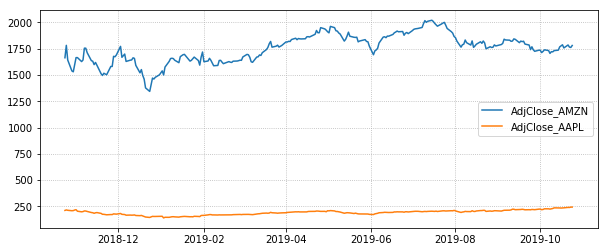

In [6]:
# Sampele Plotting

plt.figure(figsize=(10,4))
plt.plot(cdf.Date, cdf.AdjClose_AMZN)
plt.plot(cdf.Date, cdf.AdjClose_AAPL)
plt.legend()
plt.grid(linestyle=':');


### 수작업으로 다운로드한 파일을 읽어 들이기 (Google Trend : Pandas and Numpy -- USA)
- pytrends API를 사용한 access도 가능

In [7]:
gt01 = pd.read_csv(localdataPath + 'numpy_pandas_gt_20190808.csv')
gt01.head()

,date,pandas,numpy
0,2014-08-10,26,7
1,2014-08-17,25,8
2,2014-08-24,25,6
3,2014-08-31,24,8
4,2014-09-07,24,8


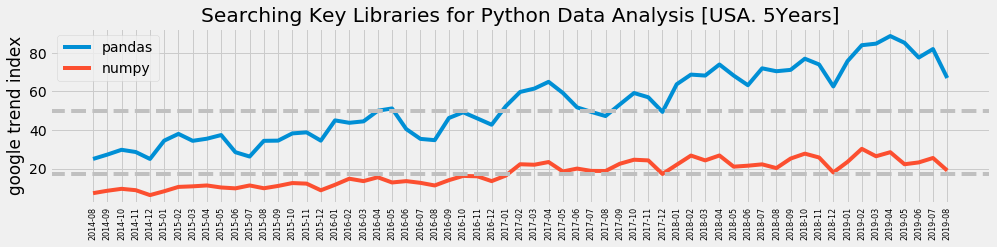

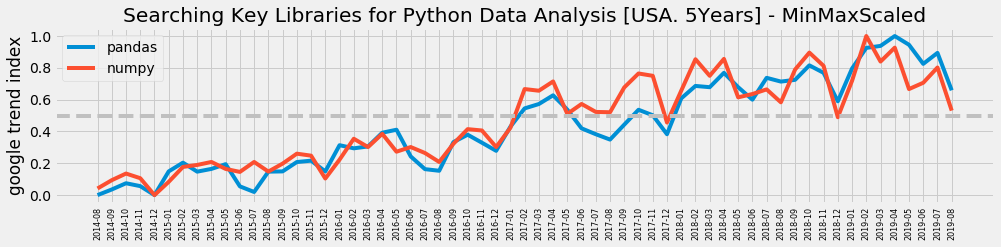

In [8]:
import matplotlib.style as style 
style.use('fivethirtyeight')

# 년-월-일 형식의 날짜 string을 년-월 형식으로 평균으로 집계
gt01['yearmon']= gt01.date.str[:7]
gt01a = gt01.groupby('yearmon').mean().reset_index()
# print(gt01a)

plt.figure(figsize=(15,3))
plt.plot(gt01a['yearmon'],  gt01a['pandas'])
plt.plot(gt01a['yearmon'],  gt01a['numpy'])
plt.legend(['pandas','numpy'], loc='upper left')
plt.title('Searching Key Libraries for Python Data Analysis [USA. 5Years]')
plt.xticks(rotation=90, size=8)
plt.axhline(gt01a['pandas'].median(), color='silver', linestyle='--')
plt.axhline(gt01a['numpy'].median(), color='silver', linestyle='--')
plt.ylabel('google trend index')
plt.show()

# min max scaling
g1 = gt01a['pandas']
g1 = (g1-g1.min())/(g1.max()-g1.min())
g2 = gt01a['numpy']
g2 = (g2-g2.min())/(g2.max()-g2.min())

# 사용자 정의 함수 형태로 정리
def plotGT(x, g1, g2, titleText):
    plt.figure(figsize=(15,3))
    plt.plot(x,  g1)
    plt.plot(x,  g2)
    plt.legend(['pandas','numpy'], loc='upper left')
    plt.title(titleText)
    plt.xticks(rotation=90, size=8)
    plt.axhline(0.5, color='silver', linestyle='--')
    plt.ylabel('google trend index')
    plt.show()

# 사용자 정의 함수 실행
plotGT(gt01a['yearmon'], g1, g2, 'Searching Key Libraries for Python Data Analysis [USA. 5Years] - MinMaxScaled')

### No Japan 운동? - 구글트렌드 보기

         date  uniclo  daiso  abcmart
0  2016-10-30      52     51        6
1  2016-11-06      37     57        7
2  2016-11-13      46     64        6
3  2016-11-20      48     50        6
4  2016-11-27      37     52       10


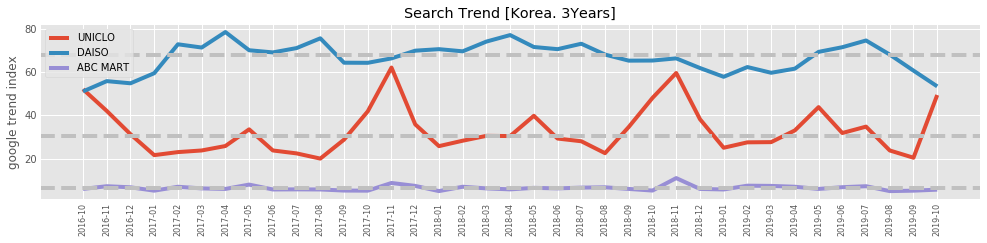

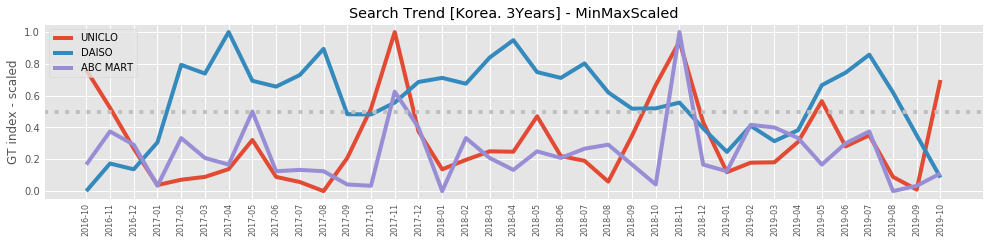

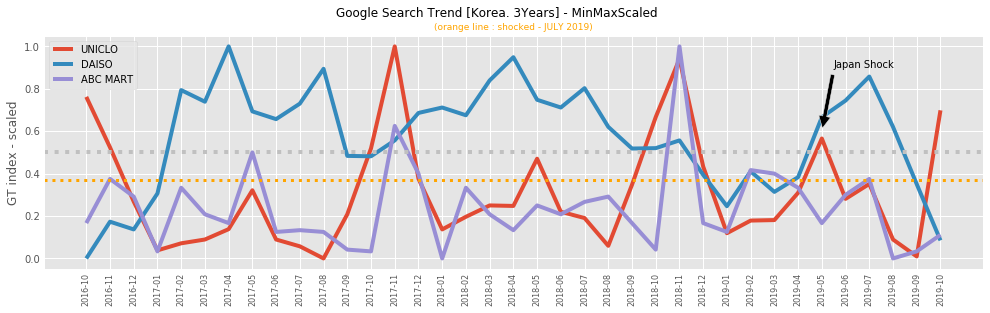

In [9]:
import matplotlib.style as style 
# style.use('fivethirtyeight')
style.use('ggplot')
# style.use('classic')

# 미리 구글트렌드에서 다운로드 후 정리해서 로딩
# 참고 : pytrends 라는 API도 존재해서 (https://pypi.org/project/pytrends/1.1.3/)
# 직접 연결해 데이터를 가져오는 것도 가능

gt01 = pd.read_csv(localdataPath + 'unicloGT_20191026.csv')
print(gt01.head())


# 년-월-일 형식의 날짜 string을 년-월 형식으로 평균으로 집계
gt01['yearmon']= gt01.date.str[:7]
gt01a = gt01.groupby('yearmon').mean().reset_index()
# print(gt01a)

plt.figure(figsize=(15,3))
plt.plot(gt01a['yearmon'],  gt01a['uniclo'])
plt.plot(gt01a['yearmon'],  gt01a['daiso'])
plt.plot(gt01a['yearmon'],  gt01a['abcmart'])
plt.legend(['UNICLO','DAISO', 'ABC MART'], loc='upper left')
plt.title('Search Trend [Korea. 3Years]')
plt.xticks(rotation=90, size=8)
plt.axhline(gt01a['uniclo'].median(), color='silver', linestyle='--')
plt.axhline(gt01a['daiso'].median(), color='silver', linestyle='--')
plt.axhline(gt01a['abcmart'].median(), color='silver', linestyle='--')
plt.ylabel('google trend index')
plt.show()

# min max scaling
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

g1 = mnmx_scl(gt01a['uniclo'])
g2 = mnmx_scl(gt01a['daiso'])
g3 = mnmx_scl(gt01a['abcmart'])

# 사용자 정의 함수 형태로 정리
def plotGT(x, g1, g2, g3, titleText):
    plt.figure(figsize=(15,3))
    plt.plot(x,  g1)
    plt.plot(x,  g2)
    plt.plot(x,  g3)
    plt.legend(['UNICLO','DAISO', 'ABC MART'], loc='upper left')
    plt.title(titleText)
    plt.xticks(rotation=90, size=8)
    plt.axhline(0.5, color='silver', linestyle=':')
    plt.ylabel('GT index - scaled')
    plt.show()

# 사용자 정의 함수 실행
plotGT(gt01a['yearmon'], g1, g2, g3, 'Search Trend [Korea. 3Years] - MinMaxScaled')

# 사용자 정의 함수 형태로 정리
def plotGT(x, g1, g2, g3, titleText):
    plt.figure(figsize=(15,4))
    plt.plot(x,  g1)
    plt.plot(x,  g2)
    plt.plot(x,  g3)
    plt.legend(['UNICLO','DAISO', 'ABC MART'], loc='upper left')
    plt.suptitle(titleText)
    plt.title('(orange line : shocked - JULY 2019)', size=9, color='orange')
    plt.xticks(rotation=90, size=8)
    plt.axhline(0.5, color='silver', linestyle=':')
    plt.axhline(0.37, color='orange', linestyle=':', linewidth=3)
    plt.ylabel('GT index - scaled')
    plt.annotate('Japan Shock', xy=(31, 0.6), xytext=(31.5, 0.9),
             arrowprops=dict(facecolor='black', shrink=0.05))
    plt.show()

# 사용자 정의 함수 실행
plotGT(gt01a['yearmon'], g1, g2, g3, 'Google Search Trend [Korea. 3Years] - MinMaxScaled')


- 유니클로에 대한 관심이 다시 늘어나고 있다면?? 예년과 마찬가지의 계절적 패턴을 보인다면 그 의미는?

## Crawling or Scraping

In [10]:
# to install packages

# pip install requests beautifulsoup4

### 교보문고의 베스트셀러 웹페이지를 가져오기
- 많이 사용하는 Requests 라이브러리는 html을 '의미있는', 즉 Python이 이해하는 객체 구조로 만들어주지는 못하는 문제점 있음. python의 문자열(str) 객체를 반환할 뿐이기 때문에 정보를 추출하기가 어려움
- BeautifulSoup 를 대신 이용하는 경우 많음.BeautifulSoup은 html 코드를 Python이 이해하는 객체 구조로 변환하는 Parsing을 수행, '의미있는' 정보를 추출하는 것을 지원.

In [11]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.kyobobook.co.kr/bestSellerNew/bestseller.laf')
bsObject = BeautifulSoup(html, "html.parser")

# 책의 상세 웹페이지 주소를 추출하여 리스트에 저장
book_page_urls = []
for cover in bsObject.find_all('div', {'class':'detail'}):
    link = cover.select('a')[0].get('href')
    book_page_urls.append(link)

# 메타 데이터로부터 필요한 정보를 추출
# 메타 데이터에 없는 저자 정보만 따로 가져오기.   
for index, book_page_url in enumerate(book_page_urls):
    html = urlopen(book_page_url)
    bsObject = BeautifulSoup(html, "html.parser")
    title = bsObject.find('meta', {'property':'rb:itemName'}).get('content')
    author = bsObject.select('span.name a')[0].text
    
    # url = bsObject.find('meta', {'property':'rb:itemUrl'}).get('content')
    originalPrice = bsObject.find('meta', {'property': 'rb:originalPrice'}).get('content')
    salePrice = bsObject.find('meta', {'property':'rb:salePrice'}).get('content')

    # print(index+1, title, author, image, url, originalPrice, salePrice)
    print(index+1, title, author, originalPrice, salePrice)

1 지쳤거나 좋아하는 게 없거나 글배우
					 13500 12150
2 흔한남매. 2 흔한남매 (원작)
					, 백난도 11000 9900
3 82년생 김지영 조남주
					 13000 11700
4 90년생이 온다 임홍택
					 14000 12600
5 혼자가 혼자에게 이병률
					 15500 13950
6 여행의 이유 김영하
					 13500 12150
7 사피엔스 유발 하라리
					 22000 19800
8 베스트 셀프 마이크 베이어
					 18700 16830
9 정혜영의 식탁 정혜영
					 26800 24120
10 오늘은 이만 좀 쉴게요(한정판 스페셜 에디션) 손힘찬(오가타 마리토)
					 13000 11700
11 설민석의 삼국지. 1 설민석
					 22000 19800
12 2020 부의 지각변동 박종훈
					 17000 15300
13 물 만난 물고기 이찬혁
					 15000 13500
14 추리 천재 엉덩이 탐정. 8: 괴도와 납치된 신부 사건 트롤
					 12000 10800
15 나는 나로 살기로 했다(200쇄 기념 스페셜 에디션) 김수현
					 13800 12420
16 봉제인형 살인사건 다니엘 콜
					 15000 13500
17 긴 이별을 위한 짧은 편지 페터 한트케
					 10000 9000
18 마법천자문. 46: 헷갈려라! 미혹할 미 김현수
					 12000 10800
19 빨강 머리 앤 루시 모드 몽고메리
					 16800 15120
20 꽃을 보듯 너를 본다 나태주
					 10000 9000


### 유튜브 검색결과를 수집    

In [12]:
import requests
from bs4 import BeautifulSoup

# 유튜브 특정 키워드 검색 결과 url 복사
# [파이썬] 검색결과
r = requests.get('https://www.youtube.com/results?search_query=%ED%8C%8C%EC%9D%B4%EC%8D%AC')
html = r.text  

# [머신러닝] 검색결과
r = requests.get('https://www.youtube.com/results?search_query=머신러닝')
html = r.text  

html

'  <!DOCTYPE html><html lang="ko-KR" data-cast-api-enabled="true"><head><style name="www-roboto" >@font-face{font-family:\'Roboto\';font-style:italic;font-weight:500;src:local(\'Roboto Medium Italic\'),local(\'Roboto-MediumItalic\'),url(//fonts.gstatic.com/s/roboto/v18/KFOjCnqEu92Fr1Mu51S7ACc6CsE.ttf)format(\'truetype\');}@font-face{font-family:\'Roboto\';font-style:italic;font-weight:400;src:local(\'Roboto Italic\'),local(\'Roboto-Italic\'),url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format(\'truetype\');}@font-face{font-family:\'Roboto\';font-style:normal;font-weight:400;src:local(\'Roboto Regular\'),local(\'Roboto-Regular\'),url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format(\'truetype\');}@font-face{font-family:\'Roboto\';font-style:normal;font-weight:500;src:local(\'Roboto Medium\'),local(\'Roboto-Medium\'),url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format(\'truetype\');}</style><script name="www-roboto" >if (document.f

In [13]:
# html 페이지에 대한 파서 - Beautiful Soup 사용
soup = BeautifulSoup(html, 'html.parser')

# titles = soup.select('.yt-lockup-title ')
titles = soup.select('.yt-lockup-content ')
metas = soup.select('.yt-lockup-meta ')

title_list = []
lent_title = 20
for title in titles[:lent_title]:
    title_list.append(title.text)
meta_list = []
for metac in metas[:lent_title]:
    meta_list.append(metac.text)    

df = pd.DataFrame({'title': title_list,
                  'meta':meta_list})
df

,meta,title
0,"1개월 전조회수 39,384회",머신러닝 vs 딥러닝 vs 인공지능? A.I. 개념정리! - 길이: 7:46노마드 ...
1,"2년 전조회수 69,659회","[리얼밸리 EP 05] 머신러닝, 딥러닝 초간단 설명 - 길이: 7:13EO2년 전..."
2,"4개월 전조회수 12,549회",머신러닝의 기초 - 선형 회귀 한 번에 제대로 이해하기 (30분만 투자해봐요!) -...
3,"3년 전조회수 104,602회",머신러닝 1시간으로 입문하기 - 길이: 55:44Terry TaeWoong Um3년...
4,9:14초간단 머신러닝 개발 환경 세팅하기 (with 아나콘다)14:53주피터 노트...,머신러닝 - 재생목록Minsuk Heo 허민석9:14초간단 머신러닝 개발 환경 세팅...
5,모든 재생목록 보기,"머신러닝, 딥러닝, 빅데이터가 도대체 뭐야? ft. 스탠포드 박사 - 길이: 10:..."
6,"2개월 전조회수 63,802회",인공지능을 위한 머신러닝 알고리즘 1강 머신러닝 개요 | T아카데미 - 길이: 32...
7,"2년 전조회수 34,120회","머신러닝 vs 딥러닝 차이점 - 길이: 3:48MATLAB 9개월 전조회수 8,54..."
8,"9개월 전조회수 8,540회",[머신러닝] 컴퓨터가 학습을 하는 원리 - 길이: 8:07컴맹이 해커가 되기까지2년...
9,"2년 전조회수 71,610회",2016 여름 머신러닝 워크샵 1일차 강의 (KAIST 오혜연 교수님) - 길이: ...


In [14]:
# df.to_csv(localdataPath + 'ML_youtube_sample.csv')

In [15]:
import urllib
# from urllib.request import urlopen

# 생명보험
URL =  'https://www.youtube.com/results?search_query=%EC%83%9D%EB%AA%85%EB%B3%B4%ED%97%98'

# 신용카드
URL =  'https://www.youtube.com/results?search_query=%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C'

# 인공지능
# URL =  'https://www.youtube.com/results?search_query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5'
    
f = urllib.request.urlopen(URL) 
soup = BeautifulSoup(f, "html.parser", from_encoding='utf-8')

LinkListRAW = soup.findAll(class_="yt-lockup-content")

title_list = []
count_list = []
date_list = []

for Link_RAW in LinkListRAW:
    # print('Link_RAW:\n', Link_RAW)
    parseLink=Link_RAW.find("a")
    # print('\nparseLink:\n', parseLink)
    Title=parseLink.get("title")
    # print(Title)
    title_list.append(Title)    
    
    ReadCountRaw=(Link_RAW.find("ul").text)
    # print("\nul : \n", Link_RAW.find("ul"))
    ReadCountRawPoint=(Link_RAW.find("ul").text).find("수")+1
    
    # print(ReadCountRawPoint)
    ReadCount=(ReadCountRaw[ReadCountRawPoint:]).replace(" ","").replace(",","").replace("회","")
    # print(ReadCount)
    if ReadCount == '모든재생목록보기':
        ReadCount = '재생목록'
    count_list.append(ReadCount)    
    
    ReadCountRawPoint=(Link_RAW.find("ul").text).find("게시일")+1
    ReadCountRawPointe=(Link_RAW.find("ul").text).find("조회수")
    ReadCount=(ReadCountRaw[ReadCountRawPoint:][:ReadCountRawPointe]).replace(" ","").replace(",","")
    date_list.append(ReadCount)    
    
    
df = pd.DataFrame({'title': title_list,
                  'count': count_list,
                  'date': date_list})
# print(count_list)
df.drop_duplicates().sort_values('date', ascending=False)


,count,date,title
2,동영상106개,동영상106,카드고릴라
15,152950,9개월전,일 년 동안 사랑받은 인기 신용카드 TOP 5
12,36678,8개월전,연회비 5만 원 이하 '실속형' 마일리지 적립 카드 7종 추천
17,118311,8개월전,"[재테크] 신용카드, 14일 결제가 유리한 이유"
10,188869,8개월전,★개인신용 1등급만들기★ 신용등급을 빠르게 올리는 방법과 신용점수 향상에 도움되는 ...
22,274211,7개월전,신용카드를 이용중인 고객은 속고 있습니다. 카드사의 겉과속이 다른이유. 무조건봐야합...
14,31468,7개월전,단종되기 전에 꼭! 만들어야 할 '굴비카드' 완벽 정리
1,633252,7개월전,신용카드? 1억 있는 애들이나 쓰는 거다
20,8953,5개월전,신용카드 100% 활용하는 법
5,17719,5개월전,곰아나 실제 사용 신용카드 공개 ㅣ 전직 은행원 ㅣ 은행원 신용카드 ㅣ카드쪼개기 ㅣ...


### 네이버 실시간 검색어 스크래핑

In [16]:
import requests
from bs4 import BeautifulSoup
import datetime 

currentDT = datetime.datetime.now() # 시스템으로부터 오늘 날짜를 가져옴
print ('As of ', str(currentDT),  ": ")

resp = requests.get('https://www.naver.com/')
soup = BeautifulSoup(resp.text, 'html.parser')
titles = soup.select('.ah_roll .ah_k')  # 타이틀(제목)을 가지고 있는 클래스 명

df = pd.DataFrame(columns=['seq','text'])
seq = 0
for title in titles:
    seq += 1
    # print(seq, title.get_text())
    df = df.append({'seq':seq, 'text':title.get_text()}, ignore_index=True)
df    

As of  2019-10-26 13:23:33.811021 : 


,seq,text
0,1,캐슬스텝업
1,2,엄홍길 목걸이 가격
2,3,공인중개사 가답안
3,4,한국사능력검정시험 답
4,5,한국사능력검정시험 45회
5,6,지드래곤
6,7,심포지엄
7,8,엠씨몽
8,9,에듀윌
9,10,푸틴


In [12]:
# [참고] 어제 날짜 구하기 

import time
from datetime import date
today = date.today()
yesterday = date.fromtimestamp(time.time() - 60*60*24)

print('today ', today, 'yesterday', yesterday)

dty = yesterday.strftime('%Y-%m-%d')
dty = yesterday.strftime('%Y%m%d')
dt = today.strftime('%Y-%m-%d')
dt = today.strftime('%Y%m%d')
 
print(" dty : "+ dty )
print(" dt : "+ dt )



today  2019-10-29 yesterday 2019-10-28
 dty : 20191028
 dt : 20191029


### 다음 실시간 검색어 스크래핑

In [17]:
import requests
from bs4 import BeautifulSoup
import datetime 

currentDT = datetime.datetime.now()
print ('As of ', str(currentDT),  ": ")

resp = requests.get('https://www.daum.net/')
soup = BeautifulSoup(resp.text, 'html.parser')
titles = soup.select('.hotissue_mini a[class*=link_issue]')
ranking = soup.select('.list_mini span[class*=ir_wa]')

df = pd.DataFrame(columns=['seq','kwd'])
seq = 0
for title in titles:
    seq += 1
    # print(seq, title.get_text())
    df = df.append({'seq':seq, 'kwd':title.get_text()}, ignore_index=True)
df    

As of  2019-10-26 13:23:34.032429 : 


,seq,kwd
0,1,공인중개사 시험
1,2,에듀윌
2,3,한국사 능력시험
3,4,여수 불꽃축제
4,5,하연주
5,6,지드래곤
6,7,엄홍길
7,8,정원중
8,9,한국시리즈
9,10,정글의 법칙


### 네이버뉴스 수집

In [16]:
import requests
from bs4 import BeautifulSoup

search_word = "머신러닝"
search_word = "LG화학"


url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}'.format(search_word)
# url = 'https://search.naver.com/search.naver?&where=news&query=삼성&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=21&start=21&refresh_start=0'
req = requests.get(url)
 
if req.ok:
    html = req.text
    soup = BeautifulSoup(html,'html.parser')
 
titles_by_select = soup.select(
    'ul.type01 > li > dl > dt > a'
)
 
print("-----select사용")

#get함수이용
print("\nget함수이용")
for title in titles_by_select:
    print(title.get('title'))
 
#브래킷 사용
print("\n-----브래킷 사용")
for title in titles_by_select:
    print(title['title'])
 
 
titles_by_find_all = soup.find_all(
    "a",{"class","_sp_each_url _sp_each_title"}
)
 
print("\n-----find_all사용")
for title in titles_by_find_all:
    print(title["title"])



-----select사용

get함수이용
SK "LG가 합의 깼다" 3번째 반복… LG "저의가 불순하다"
[더벨][LG생건을 움직이는 사람들]구광모號 선원들, 차석용 사단 합류…변화 시작
원전 멈추고 태양광 늘리더니...에너지 저장장치(ESS) 화재 멈추지 않아
가전에서 먹거리까지...신남방 공략하는 기업들
달라진 LG... 투자자들에도 '강한 메시지'
[표](28일기준)(코스피 기관 순매수 Top 30) 삼성전자 1위 약 436억원, 셀트리온 187억원, NAVER 134억원, 삼성SDI 111억원, 삼성물산 176억원 주가 순으로 기관 매수 나서… 일간 순매수
LG화학, 배터리 핵심소재 양극재 확보 위해… 신설·합작·외부 조달까지
LG, 협력사·스타트업 경쟁력 키우는 대표주자로
LG-SK 소송전 ‘특허 공방’, 5년전 양사 합의 특허와 비교해보니...
LG화학:2020년 전지사업 실적개선이 예상된다..KB증권

-----브래킷 사용
SK "LG가 합의 깼다" 3번째 반복… LG "저의가 불순하다"
[더벨][LG생건을 움직이는 사람들]구광모號 선원들, 차석용 사단 합류…변화 시작
원전 멈추고 태양광 늘리더니...에너지 저장장치(ESS) 화재 멈추지 않아
가전에서 먹거리까지...신남방 공략하는 기업들
달라진 LG... 투자자들에도 '강한 메시지'
[표](28일기준)(코스피 기관 순매수 Top 30) 삼성전자 1위 약 436억원, 셀트리온 187억원, NAVER 134억원, 삼성SDI 111억원, 삼성물산 176억원 주가 순으로 기관 매수 나서… 일간 순매수
LG화학, 배터리 핵심소재 양극재 확보 위해… 신설·합작·외부 조달까지
LG, 협력사·스타트업 경쟁력 키우는 대표주자로
LG-SK 소송전 ‘특허 공방’, 5년전 양사 합의 특허와 비교해보니...
LG화학:2020년 전지사업 실적개선이 예상된다..KB증권

-----find_all사용
[더벨][LG생건을 움직이는 사람들]구광모號 선원들, 차석용 사단 합류…변화 시작
가전에서 먹거리까지...신남방 공략하는 기

### 크롤링한 뉴스 타이틀 텍스트들로 워드클라우드를 생성

In [19]:
# 한글이 챠트에서 제대로 표시되도록 설정

import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
# For Windows
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
print(font_name)
plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False #  음수를 나타내는 '-' 부호가 정상 표시되도록


Malgun Gothic


1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
title_list[:10] ==  0                        한국금형산업진흥회-위세아이텍, 금형산업에 딥러닝 적용
1    [인터뷰] 美 나스닥 상장사가 2300억에 韓 스타트업 산 이유?… “AI에서 미래...
2            NH투자증권, AI딥러닝 기술 고도화 '박차'…“고객 맞춤형 서비스 확대”
3    [영상] 아이폰 11 프로 VS 아이폰 XS 카메라 비교…‘머신러닝 더한 트리플 카메라’
4                  IBM, 새로운 고객과 혁신으로 진일보한 ‘왓슨 애니웨어’ 공개
5         [에너지포럼 2019-혁신사례①] 석유개발 머신러닝 시장 38조 규모 성장 전망
6                      모니터랩, 머신러닝 접목 보안솔루션으로 글로벌 시장 공략
7                마케터의 기본기 / 오늘의 브랜드 내일의 브랜딩 / 딥러닝 레볼루션
8            [시그널] 특례상장보단 '일반상장' 위세아이텍...4년 연속 흑자로 차별화
9                    산업 AI 시대를 여는 딥러닝 기반 ‘AI 퍼스트 사업모델’
dtype: object
[[('한국', 'Noun'), ('금', 'Noun'), ('형', 'Suffix'), ('산업', 'Noun'), ('진흥', 'Noun'), ('회', 'Noun'), ('-', 'Punctuation'), ('위세', 'Noun'), ('아이', 'Noun'), ('텍', 'Noun'), (',', 'Punctuation'), ('금', 'Noun'), ('형', 'Suffix'), ('산업', 'Noun'), ('에', 'Josa'), ('딥', 'Noun'), ('러닝', 'Noun'), ('적용', 'Noun')], [('[', 'Punctuation'), ('인터뷰', 'Noun'), (']', 'P

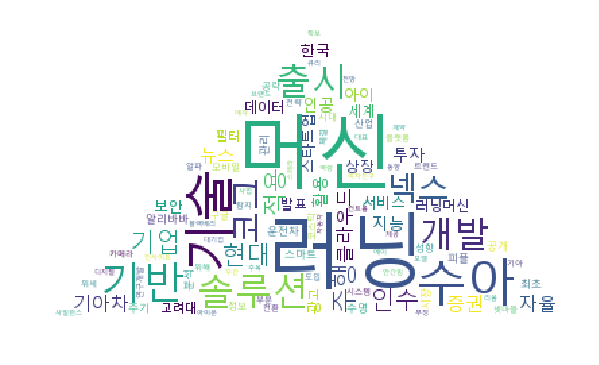

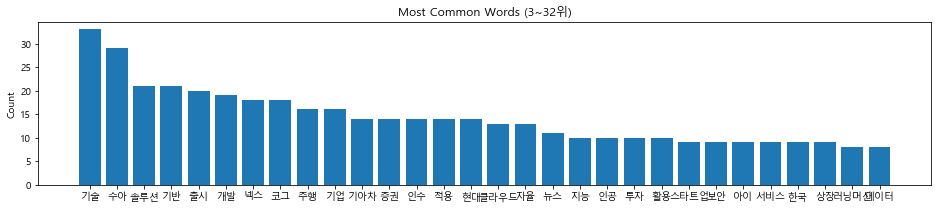

In [20]:
from bs4 import BeautifulSoup
import requests

from os import path, getcwd
from PIL import Image
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud


search_word = "자동차보험"  # 검색어 지정
# search_word = "신용카드"  # 검색어 지정
search_word = "해외여행"  # 검색어 지정
search_word = "머신러닝"  # 검색어 지정

title_list = []
 
def get_titles(start_num, end_num):
    #start_num ~ end_num까지 크롤링
    while 1:
        if start_num > end_num:
            break
        print(start_num)
 
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start={}'.format(search_word,start_num)
        req = requests.get(url)
 
        # 정상적인 request 확인
        if req.ok:
            html = req.text
            soup = BeautifulSoup(html, 'html.parser')
 
            # 뉴스제목만 뽑아오기
            titles = soup.select('ul.type01 > li > dl > dt > a')
 
            # list에 넣어주기
            for title in titles:
                title_list.append(title['title'])
        start_num += 10
    print('title_list[:10] == ', pd.Series(title_list[:10]))
    
    # 크롤링 결과 저장용 (임시)
    # pd.DataFrame({'news_title': title_list}).to_csv(dataPath + 'MLnews_sample.csv')
    
def make_wordcloud(word_count):
    twitter = Twitter()
 
    sentences_tag = []
    #형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
        # print(morph)
        # print('-' * 30)
 
    print(sentences_tag[:30])
    print('\n' * 3)
 
    noun_adj_list = []
    #명사와 형용사만 구분하여 리스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            # 한글자 길이의 단어는 스킵
            if (tag in ['Noun', 'Adjective']) and (len(word)>1):
                noun_adj_list.append(word)
 
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    # print('TAGs :: \n', tags)
 
    #wordCloud생성
    mask = np.array(Image.open(localdataPath + "triangle.png")) # triangle, roundbox, circle
    #한글 font_path 지정
    wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white', width=800, height=600,
                  mask=mask)
    # print(dict(tags))
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
    
    # draw a barchart
    plt.figure(figsize=(16,3))
    plt.bar(np.array(tags)[2:32,0], np.array(tags)[2:32,1].astype(int))
    plt.title('Most Common Words (3~32위)')
    plt.ylabel('Count')
    plt.show()
    
    
    
 
if __name__ == '__main__':
    #1~200번게시글 까지 크롤링
    get_titles(1,200)
 
    #단어 일정개수로 한정해서 wordcloud 출력
    make_wordcloud(100)


### 국내 시장 주가 크롤링 

In [21]:
# [파이썬 크롤링 beautifulsoup 주가]

import requests
from bs4 import BeautifulSoup
import datetime 
 
# company_code를 입력받아 bs_obj를 출력
def get_bs_obj(company_code):
    url = "https://finance.naver.com/item/main.nhn?code=" + company_code
    result = requests.get(url)
    bs_obj = BeautifulSoup(result.content, "html.parser")
    return bs_obj
 
# company_code를 입력받아 now_price를 출력
def get_price(company_code):
    bs_obj = get_bs_obj(company_code)
    no_today = bs_obj.find("p", {"class": "no_today"})
    blind = no_today.find("span", {"class": "blind"})
    now_price = blind.text
    return now_price
 
    
# 펄어비스 회사 코드 "263750"
# 삼성전자 회사 코드 "005930"
# 셀트리온 회사 코드 "068270"
company_codes = ["263750", "005930", "068270"]

# [아이투자 슈퍼스톡스클럽] 기대주 Top 5 저PER
# 동부건설    005960
# 휴니드    005870
# 이엔에프테크놀로지    102710
# 에코프로    086520
# 이녹스첨단소재    272290

company_codes = ["005960", "005870", "102710", "086520", "272290"]
company_names = ["동부건설", "휴니드", "이엔에프테크놀로지", "에코프로", "이녹스첨단소재"]

currentDT = datetime.datetime.now()
print ('As of ', str(currentDT),  ": ")

i=0
for item in company_codes:      
    now_price = get_price(item)
    print(item, ' : ', now_price, company_names[i])
    i += 1

As of  2019-10-29 08:25:25.419179 : 
005960  :  8,800 동부건설
005870  :  6,890 휴니드
102710  :  25,750 이엔에프테크놀로지
086520  :  20,800 에코프로
272290  :  56,700 이녹스첨단소재


### 종목코드 테이블을 구성한 후 필요 종목 데이터 가져오기

In [22]:
code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
code_df.종목코드 = code_df.종목코드.map('{:06d}'.format)
code_df = code_df[['회사명', '종목코드']]
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})
code_df.head(20)

,name,code
0,DSR,155660
1,GS글로벌,001250
2,HSD엔진,082740
3,LG이노텍,011070
4,OCI,010060
5,SK네트웍스,001740
6,SK이노베이션,096770
7,STX,011810
8,WISCOM,024070
9,갤럭시아에스엠,011420


In [23]:
def get_url(item_name, code_df):

    # 코드를 가져오기 위한 처리.
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index = False)

    # url은 일일 종가 시가 고가 저가 거래량을 보여주는 표
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code = code)
    print("요청 URL = {}".format(url))
    return url



# 특정 종목 정보 가져오기

item_name = '삼성SDI'
url = get_url(item_name, code_df)
df = pd.DataFrame()

# 크롤링. 페이지 30까지 크롤링을 한다.

for page in range(1, 31):

    # url에 page를 붙여줘서 url 포맷을 만들어준다.
    pg_url = '{url}&page={page}'.format(url = url, page = page)
    df = df.append(pd.read_html(pg_url, header = 0)[0], ignore_index= True)

# df.dropna()를 이용해 결측값(NaN) 있는 행을 제거
df = df.dropna()

# 상위 5개 데이터 확인하기
print("\n", item_name, " ----------- ")
df.head()

요청 URL = http://finance.naver.com/item/sise_day.nhn?code=006400

 삼성SDI  ----------- 


,날짜,종가,전일비,시가,고가,저가,거래량
1,2019.10.29,229500.0,0.0,229500.0,229500.0,229500.0,0.0
2,2019.10.28,229500.0,3500.0,227000.0,230000.0,226000.0,186414.0
3,2019.10.25,226000.0,0.0,227000.0,227000.0,225500.0,116348.0
4,2019.10.24,226000.0,1500.0,226500.0,227500.0,224000.0,137278.0
5,2019.10.23,224500.0,0.0,223000.0,225000.0,222500.0,127242.0


삼성SDI


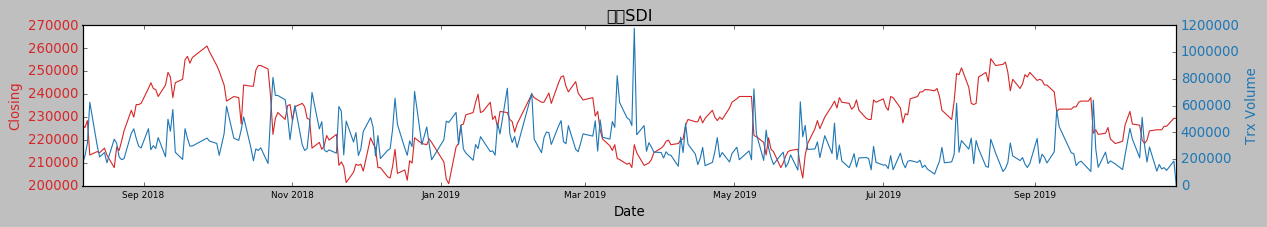

In [25]:
# Visualization

# import numpy as np
# import matplotlib.pyplot as plt

style.use('classic')

fig, ax1 = plt.subplots(figsize=(16,3))

t= pd.to_datetime(df.날짜)

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing', color=color)
ax1.plot(t, df.종가, color=color)
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Trx Volume', color=color)  # we already handled the x-label with ax1
ax2.plot(t, df.거래량, color=color)
plt.title(item_name)
print(item_name)
ax1.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()